<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation
© 2022, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Hotel Bookings
**Objective:**

In this notebook, we are going to go through data transformation techniques, which are:
- Data Binning or Bucketing: A pre-processing technique used to reduce the effects of minor observation errors. The sample is divided into intervals and replaced by categorical values.
- Indicator variables: This technique converts categorical data into Boolean values by creating indicator variables. If we have more than two values (n) we have to create n-1columns.
- Centering & Scaling: We can center the data of one feature by subtracting the mean to all values. To scale the data, we should divide the centered feature by the standard deviation.

## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
%cd machine_learning_certification/

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/machine_learning_certification


We load the dataset via pd.read_csv, and we take a look at its first columns using the .head() dataframe function.

In [ ]:
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Binning or Bucketing
A pre-processing technique used to reduce the effects of minor observation errors. The sample is divided into intervals and replaced by categorical values.

In [ ]:
bins=[0.0, 200.0, 300.0, 600.0, 5400.0]
group=['Low','Average','High', 'Very high']
df['ADR_Category']= pd.cut(df['adr'], bins, labels=group)
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ADR_Category
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Low
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Average
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Low
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Low
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,Low


# Indicator variables
This technique converts categorical data into Boolean values by creating indicator variables. If we have more than two values(n) we have to create n-1 columns and follow what is known as one-hot encoding (see example below).

Also known as "encoding" of categorical variables.

In [ ]:
pd.get_dummies(df['customer_type']).head()

,Contract,Group,Transient,Transient-Party
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
df_dummies = pd.get_dummies(df, prefix='customer_type', prefix_sep='.', columns=['customer_type'])
df_dummies.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ADR_Category,customer_type.Contract,customer_type.Group,customer_type.Transient,customer_type.Transient-Party
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,0.0,0,0,Check-Out,2015-07-01,NaN,0,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,0.0,0,0,Check-Out,2015-07-01,NaN,0,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,75.0,0,0,Check-Out,2015-07-02,Low,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,75.0,0,0,Check-Out,2015-07-02,Low,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,98.0,0,1,Check-Out,2015-07-03,Low,0,0,1,0


# Centering & Scaling

We examine below the distribution of the *adr* (average daily rate) below for any peculiar observations.

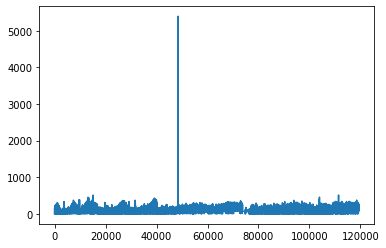

In [ ]:
plt.plot(df['adr'].values)

There is one value that is much bigger than other values - an outlier.

We need to remove it as it as acting like an error pulse which will impact our model.

In [ ]:
df.drop(df['adr'].idxmax(), inplace=True) # Removing the row by finding the biggest value

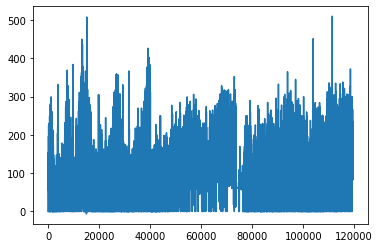

In [ ]:
plt.plot(df['adr'].values) # after Removing the spike value the data distrubution shown below

**Standardization** is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution, ie. with a mean of 0 and a standard deviation of 1.

• We can standardize data using scikit-learn's `StandardScaler class`

In [ ]:
cols_to_norm = ['adr']
scaler = StandardScaler().fit(df[cols_to_norm])
df[cols_to_norm] = scaler.transform(df[cols_to_norm])

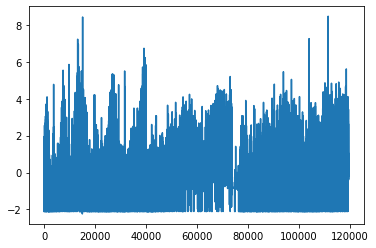

In [ ]:
plt.plot(df['adr'].values)

By visual inspection, it looks that the mean is closer to zero and the std is close to 1, but let's verify it.

In [ ]:
ADR_Mean= df['adr'].values.mean()
print ('adr Mean: ',ADR_Mean)

adr Mean:  3.7327760837994694e-16


In [ ]:
ADR_Std= df['adr'].values.std()
print ('ADR Standard deviation: ',ADR_Std)

ADR Standard deviation:  1.0


#### fit scaler on other numerical features

If we fit StandardScaler on columns with missing values, an exception will occur.

So we have to fill missing values, then apply the StandardScaler.

In [ ]:
# let's first look at the overall statistics summary
df_numerical= df[['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']]
df_numerical.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,104.011994,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.087119,0.137098,0.221118,2.321169,0.062518,0.571368
std,106.863358,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.844340,1.497443,0.652304,17.594793,0.245292,0.792800
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


In [ ]:
df_numerical.children.fillna(df_numerical.children.mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_numerical= scaler.fit_transform(df_numerical)

# PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.


In [ ]:
pca = PCA(n_components=2) # applying PCA to project onto a 2D sub-space
principalComponents = pca.fit_transform(df_numerical)

In [ ]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_Df.tail()

,principal component 1,principal component 2
119384,-1.679914,0.005005
119385,-0.040243,-0.042032
119386,-1.451659,-0.001501
119387,0.105062,-0.046068
119388,2.097673,-0.104359
